## matala 2 - pandas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')
data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_27632\3054585040.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [3]:
data = data.sort_values(["user_id", "user_session","event_time"]).reset_index()
data = data.iloc[:1000000]
data

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,437209,2019-11-04 15:28:57 UTC,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d
1,2494623,2019-11-19 11:14:48 UTC,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c
2,2640971,2019-11-20 11:58:06 UTC,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0
3,2641003,2019-11-20 11:58:27 UTC,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0
4,2641209,2019-11-20 11:59:39 UTC,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0
...,...,...,...,...,...,...,...,...,...,...
999995,3355561,2019-11-23 17:50:23 UTC,view,5649272,1487580013749338323,NaN,concept,4.63,458045796,57ef2a82-d1c2-4dc9-9c6b-30787cd66f8c
999996,2966241,2019-11-22 06:27:23 UTC,view,5823778,1487580013749338323,NaN,estel,2.25,458045796,677d50ce-b836-4a94-be8f-d673c4531c52
999997,2967079,2019-11-22 06:33:07 UTC,cart,5677026,1487580008246412266,NaN,estel,4.14,458045796,677d50ce-b836-4a94-be8f-d673c4531c52
999998,3183245,2019-11-22 20:08:17 UTC,remove_from_cart,5677044,1487580008246412266,NaN,estel,7.46,458045796,7343eb65-5f7d-4da4-bff4-29ebcfaeb53b


q1:

In [4]:
data['event_time'] = pd.to_datetime(data['event_time'])

def time_diff(row):
    index = row.name
    next_index = index+1
    if index == len(data)-1:
        return 0
    
    if data.loc[index,'user_session'] == data.loc[next_index,'user_session']:
        diff = (data.loc[next_index,'event_time'] - data.loc[index,'event_time']).seconds
        return diff
    else:
        return 0


data['duration_to_next_event'] = data.apply(time_diff, axis = 1)
data

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0
1,2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0
2,2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21
3,2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72
4,2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28
...,...,...,...,...,...,...,...,...,...,...,...
999995,3355561,2019-11-23 17:50:23+00:00,view,5649272,1487580013749338323,NaN,concept,4.63,458045796,57ef2a82-d1c2-4dc9-9c6b-30787cd66f8c,0
999996,2966241,2019-11-22 06:27:23+00:00,view,5823778,1487580013749338323,NaN,estel,2.25,458045796,677d50ce-b836-4a94-be8f-d673c4531c52,344
999997,2967079,2019-11-22 06:33:07+00:00,cart,5677026,1487580008246412266,NaN,estel,4.14,458045796,677d50ce-b836-4a94-be8f-d673c4531c52,0
999998,3183245,2019-11-22 20:08:17+00:00,remove_from_cart,5677044,1487580008246412266,NaN,estel,7.46,458045796,7343eb65-5f7d-4da4-bff4-29ebcfaeb53b,0


q2:

In [5]:
funnel_list = [1]
def funnel_check(row):
    row_index = row.name
    prev_index = row_index-1
    if row_index == 0:
        return funnel_list[0]
    if data.loc[row_index,'user_session'] == data.loc[prev_index,'user_session']:
        return funnel_list[-1]
    else:
        if data.loc[row_index,'user_id'] == data.loc[prev_index,'user_id']:
            if (data.loc[row_index,'event_time'] - data.loc[prev_index,'event_time']).days > 5:
                funnel_list.append(funnel_list[-1]+1)
            return funnel_list[-1]
        else:
            funnel_list.append(1)
            return funnel_list[-1]
data['funnel_number'] = data.apply(funnel_check, axis = 1)
data

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
0,437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0,1
1,2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0,1
2,2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21,1
3,2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72,1
4,2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3355561,2019-11-23 17:50:23+00:00,view,5649272,1487580013749338323,NaN,concept,4.63,458045796,57ef2a82-d1c2-4dc9-9c6b-30787cd66f8c,0,1
999996,2966241,2019-11-22 06:27:23+00:00,view,5823778,1487580013749338323,NaN,estel,2.25,458045796,677d50ce-b836-4a94-be8f-d673c4531c52,344,1
999997,2967079,2019-11-22 06:33:07+00:00,cart,5677026,1487580008246412266,NaN,estel,4.14,458045796,677d50ce-b836-4a94-be8f-d673c4531c52,0,1
999998,3183245,2019-11-22 20:08:17+00:00,remove_from_cart,5677044,1487580008246412266,NaN,estel,7.46,458045796,7343eb65-5f7d-4da4-bff4-29ebcfaeb53b,0,1


q3:

In [6]:
funnel_index = [1]

def funnel_index_func (row):
    row_index = row.name
    prev_index = row_index-1
    if row_index == 0:
        return funnel_index[0]

    if data.loc[row_index,'user_id'] == data.loc[prev_index,'user_id'] and data.loc[row_index,'funnel_number'] == data.loc[prev_index,'funnel_number']:
        if data.loc[row_index,'user_session'] != data.loc[prev_index,'user_session']:
            funnel_index.append(funnel_index[-1]+1)
    else:
        funnel_index.append(1)
    return funnel_index[-1]
        
data['index_in_funnel'] = data.apply(funnel_index_func, axis = 1)
data

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
0,437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0,1,1
1,2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0,1,1
2,2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21,1,2
3,2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72,1,2
4,2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3355561,2019-11-23 17:50:23+00:00,view,5649272,1487580013749338323,NaN,concept,4.63,458045796,57ef2a82-d1c2-4dc9-9c6b-30787cd66f8c,0,1,5
999996,2966241,2019-11-22 06:27:23+00:00,view,5823778,1487580013749338323,NaN,estel,2.25,458045796,677d50ce-b836-4a94-be8f-d673c4531c52,344,1,6
999997,2967079,2019-11-22 06:33:07+00:00,cart,5677026,1487580008246412266,NaN,estel,4.14,458045796,677d50ce-b836-4a94-be8f-d673c4531c52,0,1,6
999998,3183245,2019-11-22 20:08:17+00:00,remove_from_cart,5677044,1487580008246412266,NaN,estel,7.46,458045796,7343eb65-5f7d-4da4-bff4-29ebcfaeb53b,0,1,7


q4:

In [7]:
import re

def numbers_only (x):
    if type(x) == str:
        x = re.findall(r"-?\d+(?:\.\d+)?", x)
        return float(x[0])
    else:
        return float(x)
    
data['price'] = data['price'].apply(numbers_only)
data['price']

0         4.05
1         2.30
2         7.46
3         7.46
4         7.46
          ... 
999995    4.63
999996    2.25
999997    4.14
999998    7.46
999999    6.92
Name: price, Length: 1000000, dtype: float64

q5:

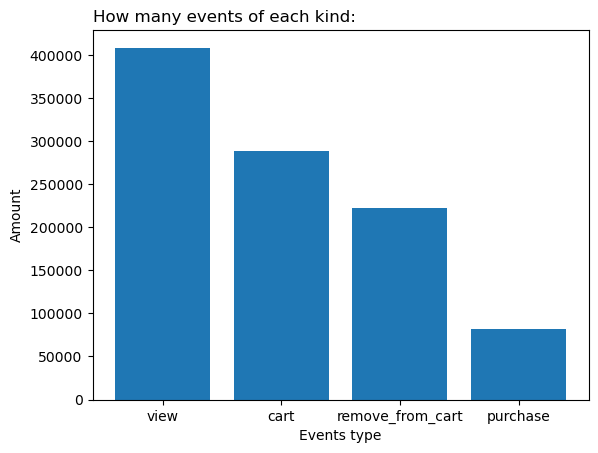

In [8]:
plt.bar(data['event_type'].value_counts().index,data['event_type'].value_counts().values)

plt.xlabel("Events type")
plt.ylabel("Amount")
plt.title("How many events of each kind:", loc = 'left') # loc - location of the label

plt.show()

q6:

In [9]:

## a,b,c,d
to_user_session = data[['user_id','user_session','funnel_number','index_in_funnel']] 
session_data = to_user_session.groupby('user_session').first().reset_index()

## e - number of events
to_user_session = data[['user_session','event_type']]
e = to_user_session.groupby('user_session').count().reset_index()
session_data = pd.merge(session_data,e, on = 'user_session', how = 'inner').rename(columns={"event_type": "Number_of_event"})

# f - duration:
to_user_session = data[['user_session','event_time']]
f = to_user_session.groupby('user_session').agg({'event_time': ['min', 'max']})
f['session_duration'] = (f['event_time']['max'] - f['event_time']['min'])
f = f['session_duration'].reset_index().rename(columns={'user_session': 'user_session', 'session_duration': 'session_duration'})
session_data = pd.merge(session_data,f, on = 'user_session', how = 'inner')

# g,h,i - lists
to_user_session = data[['user_session','event_type','product_id']]

g = to_user_session.groupby(['user_session','event_type']).agg(lambda x: x.tolist()).reset_index()

cart = g[g['event_type'] == 'cart']
cart = cart[['user_session','product_id']].rename(columns={"product_id": "list_of_added_to_cart"})

view = g[g['event_type'] == 'view']
view = view[['user_session','product_id']].rename(columns={"product_id": "list_of_viewed"})
purchase = g[g['event_type'] == 'purchase']
purchase = purchase[['user_session','product_id']].rename(columns={"product_id": "list_of_purchased"})    

session_data = pd.merge(session_data,cart, on = 'user_session', how = 'left')
session_data = pd.merge(session_data,view, on = 'user_session', how = 'left')
session_data = pd.merge(session_data,purchase, on = 'user_session', how = 'left')

session_data

,user_session,user_id,funnel_number,index_in_funnel,Number_of_event,session_duration,list_of_added_to_cart,list_of_viewed,list_of_purchased
0,0000763c-7baf-45fd-aad3-ca2076aea17d,375765155,1,1,1,0 days 00:00:00,NaN,[5849879],NaN
1,0001fe2b-e342-4755-8e75-826dc0d4aa20,230719564,1,1,1,0 days 00:00:00,NaN,[5561040],NaN
2,0002a3f2-f126-413d-97d0-2d51a6220a41,457026361,1,1,1,0 days 00:00:00,NaN,[5906536],NaN
3,00030893-e0e6-4ca9-b763-ebae5ed497c0,293170333,1,1,1,0 days 00:00:00,NaN,[5897627],NaN
4,00033a69-7570-4300-89c7-b828a8c25a21,438415013,1,1,15,0 days 00:06:05,[5861723],"[5899438, 5827353, 5678032, 5678034, 5815461, ...",NaN
...,...,...,...,...,...,...,...,...,...
152790,fffc8668-71fd-484e-abff-c18a8ca6a2dc,268849449,5,1,1,0 days 00:00:00,NaN,[5892071],NaN
152791,fffdc1ba-40b0-4658-b778-a0f89e8e6514,445854537,59,4,1,0 days 00:00:00,NaN,[5797971],NaN
152792,fffdd77b-e1cc-4d3f-8146-8c18c6ace8a1,390314700,20,5,5,0 days 00:03:26,"[5726163, 5882390, 5761412, 5861126]",[5726163],NaN
152793,fffdeb50-083e-426b-8f94-52ca411aa3fc,457573869,1,4,4,0 days 00:00:42,NaN,NaN,NaN
